In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
warnings.filterwarnings('ignore')

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Reading and understanding data

Wondering what's this data about? Let's find it out!

## Importing data

In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

## Understanding the dataframe dimensions

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Dropping Serial No. column as it does not help us to determine the dependant variable. 

In [5]:
df.drop(columns=['Serial No.'], inplace=True)

In [6]:
df.shape

(500, 8)

In [7]:
list(df.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

Removing trailing spaces in column names of LOR and Chance of Admit.

In [8]:
df.rename(columns={'LOR ':'LOR',
                  'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Identifying numerical and categorical columns

In [10]:
# statistical summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
# no. of unique values
df.nunique().sort_values()

Research               2
University Rating      5
SOP                    9
LOR                    9
TOEFL Score           29
GRE Score             49
Chance of Admit       61
CGPA                 184
dtype: int64

Since the columns Research, University Rating, SOP, LOR have less than 10 unique values out of 500 rows, we treat them as categorical variables.

Columns TOEFL Score, GRE Score, Chance of Admit, CGPA are treated as numeric variables.

In [12]:
cat_columns = ['Research', 'University Rating', 'SOP', 'LOR']
cat_columns

['Research', 'University Rating', 'SOP', 'LOR']

In [13]:
num_columns = list(set(df.columns) - set(cat_columns))
num_columns

['CGPA', 'GRE Score', 'TOEFL Score', 'Chance of Admit']

## Identifying dependant and independant variables

### Dependant variable

Chance of Admit becomes our dependant variable, which needs to be predicted.

In [14]:
y = df['Chance of Admit']

### Independant variables

All other variables other than our dependant variables become our independant variables.

In [15]:
X = df.drop(columns=['Chance of Admit'])

# Data pre-processing and cleaning

Let's groom our data.

In [16]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [17]:
# checking for missing values column-wise
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

We do not have any missing values. So we can skip the step(s) to treating missing values.

## Dependant variable

We need to treat the missing values in our dependant variable before going for independant variables.

### Chance of Admit

Since, we do not have any missing values in our data set, we do not drop any rows.

Acceptable skew range -1 to 1: -0.289966210041158


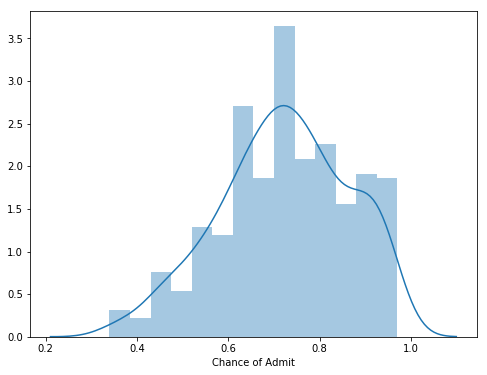

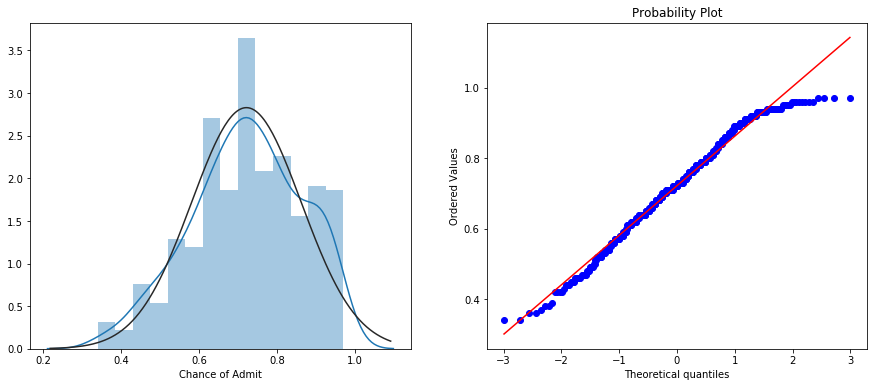

In [18]:
# observing for skew or non-linearness
print("Acceptable skew range -1 to 1:", df['Chance of Admit'].skew())

# observing the distribution
plt.figure(figsize=(8,6))
sns.distplot(df['Chance of Admit'])
plt.show()

# deviation of data from normal distribution using QQ plot
fig, ax = plt.subplots(1,2, figsize=(15,6))

mu, sigma = norm.fit(df['Chance of Admit'])
sns.distplot(df['Chance of Admit'], fit=norm, ax=ax[0])
res = stats.probplot(df['Chance of Admit'], plot=ax[1])
plt.show()

    * Skew is less, is within acceptable range.
    * Distribution of values is near to normal distribution, are deviating near right tail.
    * No transformation is required to be applied on dependant variable.

## Independant variables

We first treat for outliers and then treat for missing values.

### GRE Score
Continuous variable.

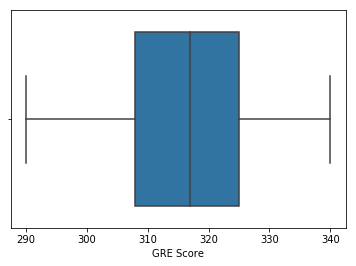

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


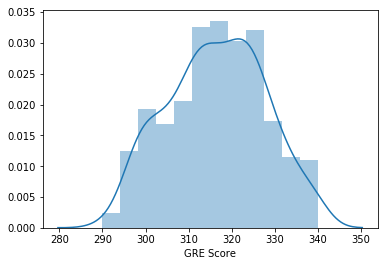

In [19]:
# checking for outliers
sns.boxplot(df['GRE Score'])
plt.show()

# checking the distribution
print(df['GRE Score'].describe())
sns.distplot(df['GRE Score'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

### TOEFL Score

Continuous variable.

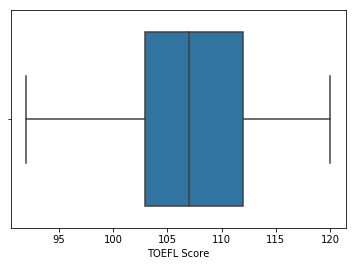

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


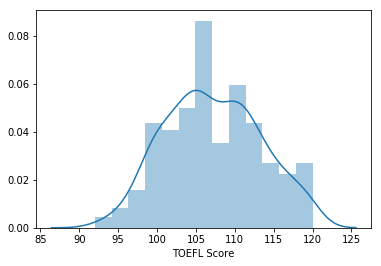

In [20]:
# checking for outliers
sns.boxplot(df['TOEFL Score'])
plt.show()

# checking the distribution
print(df['TOEFL Score'].describe())
sns.distplot(df['TOEFL Score'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

### University Rating

Categorical variable.

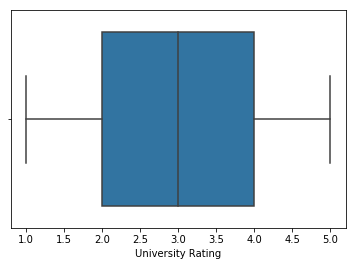

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64


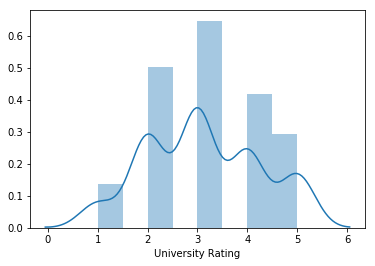

In [21]:
# checking for outliers
sns.boxplot(df['University Rating'])
plt.show()

# checking the distribution
print(df['University Rating'].describe())
sns.distplot(df['University Rating'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

### SOP

Categorical variable.

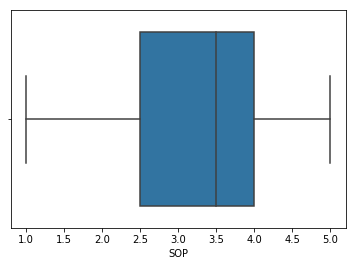

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64


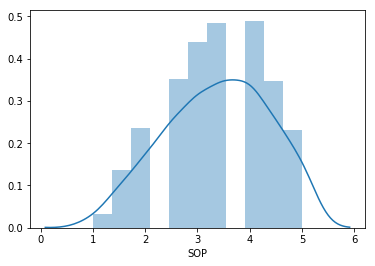

In [22]:
# checking for outliers
sns.boxplot(df['SOP'])
plt.show()

# checking the distribution
print(df['SOP'].describe())
sns.distplot(df['SOP'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

### LOR

Categorical variable.

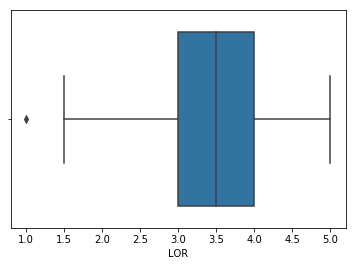

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64


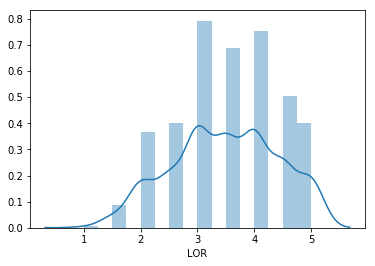

In [23]:
# checking for outliers
sns.boxplot(df['LOR'])
plt.show()

# checking the distribution
print(df['LOR'].describe())
sns.distplot(df['LOR'])
plt.show()

Removing outliers:
* Variable type: Categorical
* Method: IQR
    
Filling missing values:
* Variable type: Categorical
* No. of outliers: 1/500, very few
* Method: Median imputation

In [24]:
# removing outliers
Q1 = df['LOR'].quantile(0.25); Q3 = df['LOR'].quantile(0.75); IQR = Q3 - Q1
df['LOR'].loc[((df['LOR'] < Q1-1.5*IQR) | (df['LOR'] > Q3+1.5*IQR))] = np.NaN

# filling missing values
df['LOR'] = df['LOR'].fillna(df['LOR'].median())

### CGPA

Continuous variable.

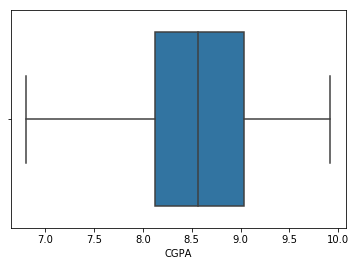

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


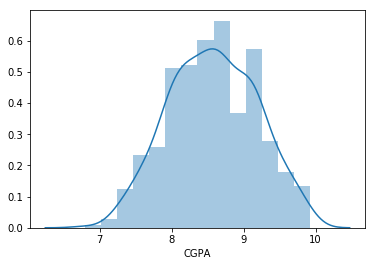

In [25]:
# checking for outliers
sns.boxplot(df['CGPA'])
plt.show()

# checking the distribution
print(df['CGPA'].describe())
sns.distplot(df['CGPA'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

### Research

Categorical variable.

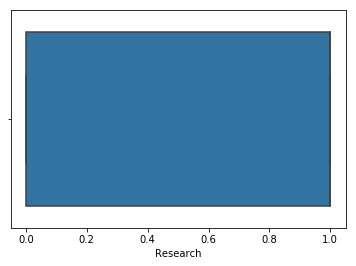

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64


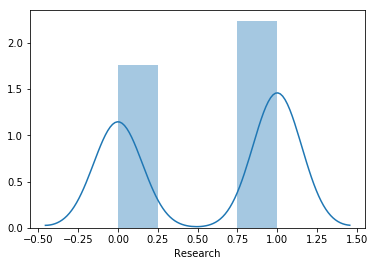

In [26]:
# checking for outliers
sns.boxplot(df['Research'])
plt.show()

# checking the distribution
print(df['Research'].describe())
sns.distplot(df['Research'])
plt.show()

Observations:
* No outliers are found.
* No missing are found.

In [27]:
# checking the variables info at the end of data pre-processing and cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Feature engineering

Let's create a few new variables which makes our data analysis more interesting and help us find few additional insights.

### Chance of Admit

We can turn this continuous variable into categorical variable to get more insights. I'm categorizing values above 75th pecentile as 1 and the rest as 0.

In [28]:
Q3 = df['Chance of Admit'].quantile(0.75)
df['High Chance'] = df['Chance of Admit'].apply(lambda x: 1 if x > Q3 else 0)

df['High Chance'].value_counts()

0    376
1    124
Name: High Chance, dtype: int64

In [29]:
# checking variables info at the end of feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
High Chance          500 non-null int64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Exploratory Data Analysis

Let's dive into our data to find some interesting insights.

## Univariate data analysis

Visualizing one variable at a time.

### GRE Score
* Min score is 290, Max score is 340, Avg score is 316.
* Most of the observations are concentrated in 310-330 range.
* The average score of top 25% of students w.r.t. chance of admit is around 330.

Statistical summary:
 count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


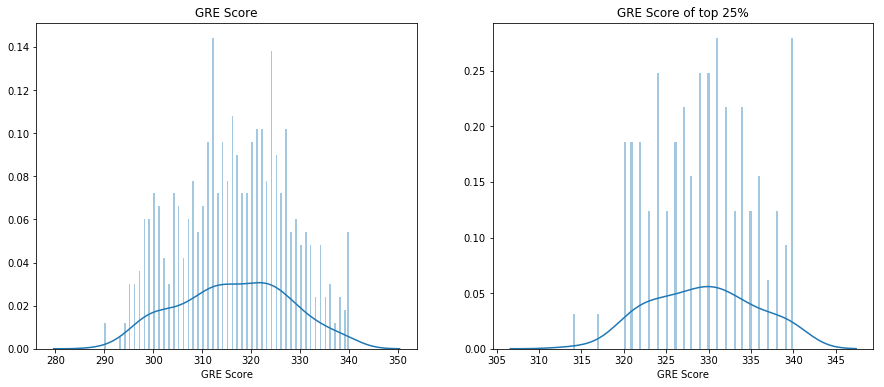

In [30]:
# statistical summary
print("Statistical summary:\n", df['GRE Score'].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df['GRE Score'], bins=150, ax=ax[0])
ax[0].set_title("GRE Score")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]['GRE Score'], bins=100, ax=ax[1])
ax[1].set_title("GRE Score of top 25%")
plt.show()

### TOEFL Score
* Min score is 92, Max score is 120, Avg score is 107.
* Most of the observations are in 103-112 range.
* Avg score of top 25% of students w.r.t. chance of admit is around 112.

Statistical summary:
 count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


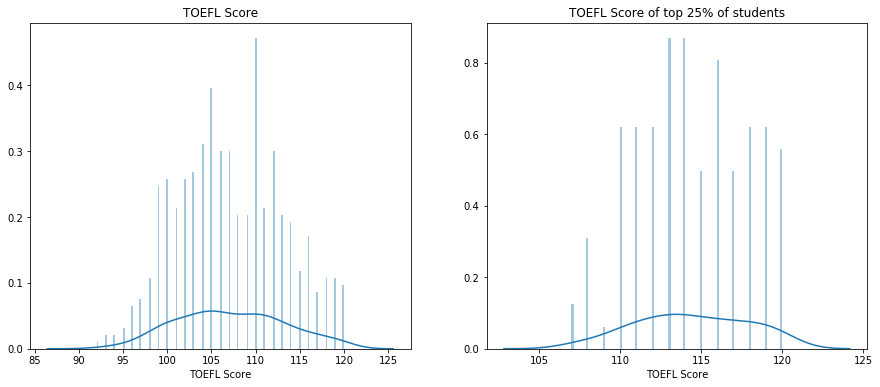

In [31]:
# statistical summary
print("Statistical summary:\n", df["TOEFL Score"].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df["TOEFL Score"], bins=150, ax=ax[0])
ax[0].set_title("TOEFL Score")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]["TOEFL Score"], bins=100, ax=ax[1])
ax[1].set_title("TOEFL Score of top 25% of students")
plt.show()

### University Rating
* Rating 3 is in highest proportion, Rating 1 is in least proportion.

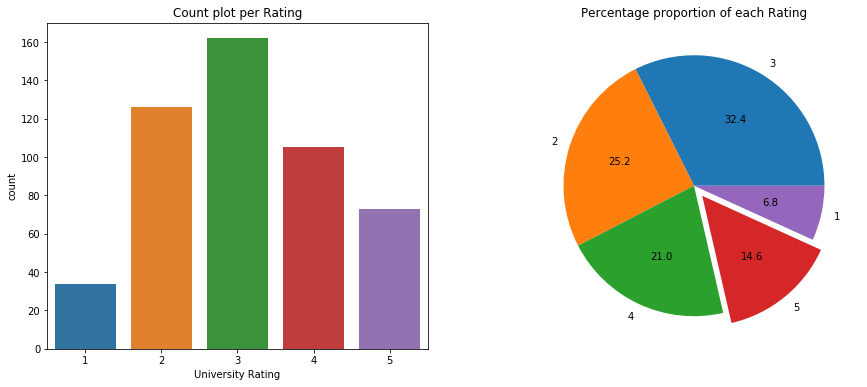

In [32]:
# count plot of each rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df['University Rating'], ax=ax[0])
ax[0].set_title("Count plot per Rating")

# percentage proportions
ax[1].pie(df['University Rating'].value_counts(), labels=df['University Rating'].value_counts().index, autopct='%1.1f',
         explode=[0,0,0,0.1,0])
ax[1].set_title("Percentage proportion of each Rating")
plt.show()

### SOP
* SOP rating of 4.0 is the observation of highest frequency.
* Top 25% of students w.r.t. chance of admit are having SOP rating of 4.0 and above.

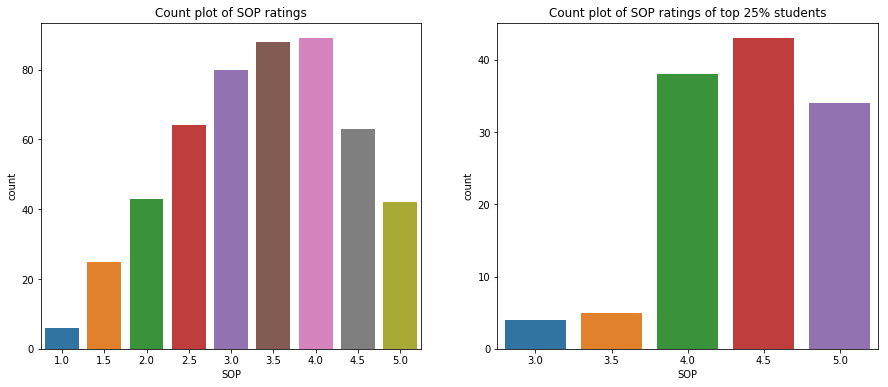

In [33]:
# count plot of each SOP rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df["SOP"], ax=ax[0])
ax[0].set_title("Count plot of SOP ratings")

# count of SOP rating for top 25% of students w.r.t. chance of admit
sns.countplot(df[df["High Chance"] == 1]["SOP"], ax=ax[1])
ax[1].set_title("Count plot of SOP ratings of top 25% students")
plt.show()

### LOR
* LOR rating of 3.0 is the observation of highest frequency.
* More no. of top 25% of students w.r.t. chance of admit are having LOR rating of 4.5 and above.

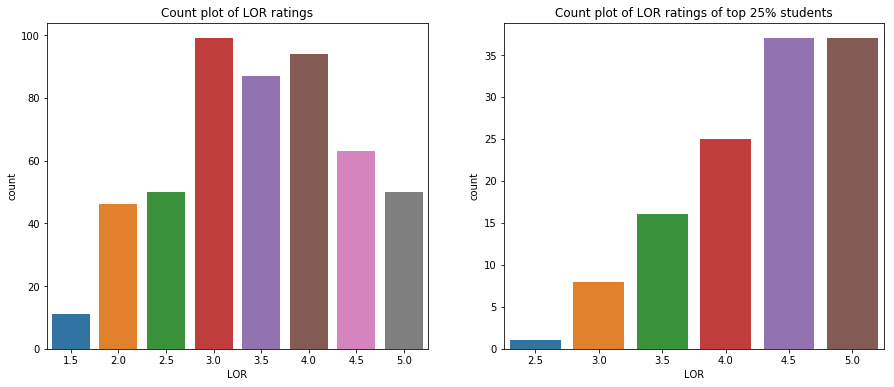

In [34]:
# count plot of each LOR rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df["LOR"], ax=ax[0])
ax[0].set_title("Count plot of LOR ratings")

# count of LOR rating for top 25% of students w.r.t. chance of admit
sns.countplot(df[df["High Chance"] == 1]["LOR"], ax=ax[1])
ax[1].set_title("Count plot of LOR ratings of top 25% students")
plt.show()

### CGPA
* Min CGPA is 6.8, Max CGPA is 9.92, Avg CGPA is 8.6.
* Most of the observations are in 8.1-9.0 range.
* Avg CGPA of top 25% of students w.r.t. chance of admit is around 9.1.

Statistical summary:
 count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


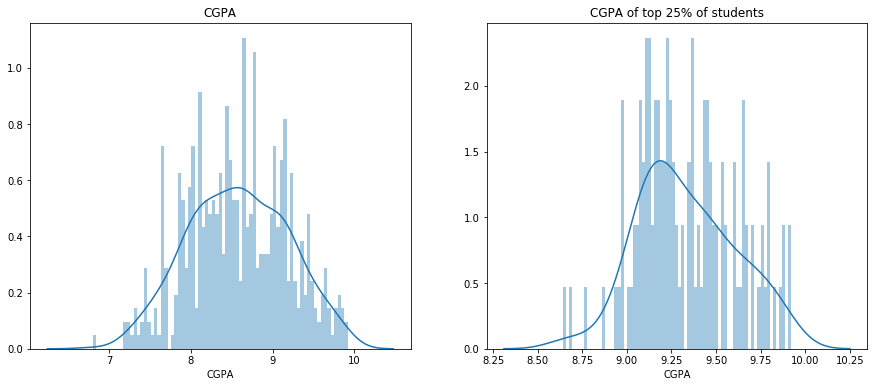

In [35]:
# statistical summary
print("Statistical summary:\n", df["CGPA"].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df["CGPA"], bins=75, ax=ax[0])
ax[0].set_title("CGPA")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]["CGPA"], bins=75, ax=ax[1])
ax[1].set_title("CGPA of top 25% of students")
plt.show()

### Research
* No. of students with research experience is 280, and is more than no. of students without research experience 220.
* Among top 25% of students w.r.t chance of admit, 95% of the students are having research experience.

1    280
0    220
Name: Research, dtype: int64


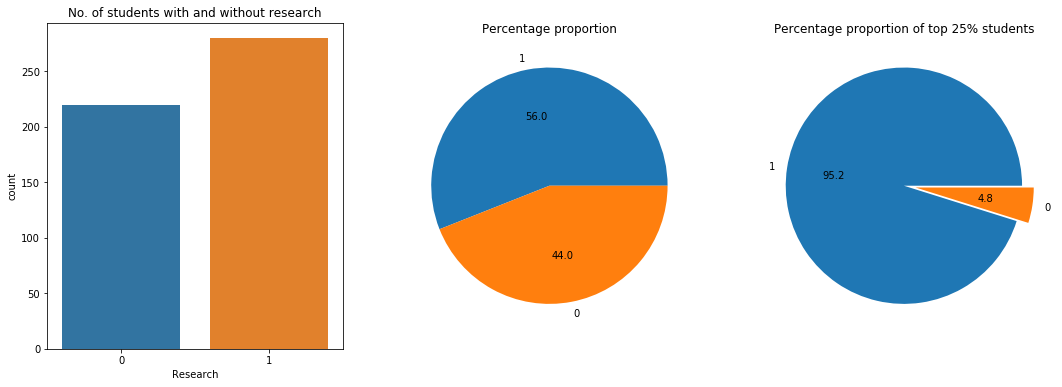

In [36]:
# no. of observations
print(df["Research"].value_counts())

# count plot of each obersations
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.countplot(df["Research"], ax=ax[0])
ax[0].set_title("No. of students with and without research")

# pie chart of percentage proportion
ax[1].pie(df["Research"].value_counts(), labels=df["Research"].value_counts().index, autopct="%1.1f")
ax[1].set_title("Percentage proportion")

# pie chart of percentage proportion for top 25% students w.r.t. chance of admit
ax[2].pie(df[df["High Chance"] == 1]["Research"].value_counts(), labels=df[df["High Chance"] == 1]["Research"].value_counts().index,
         autopct="%1.1f", explode=[0,0.1])
ax[2].set_title("Percentage proportion of top 25% students")
plt.show()

## Bivariate data analysis

Let's understand the chemistry between any two variables.

### Correlation maps
* Chance of Admit is having high positive correlation with CGPA and GRE Score.
* Also, CGPA is having high positive correlation with GRE Score and TOEFL Score.

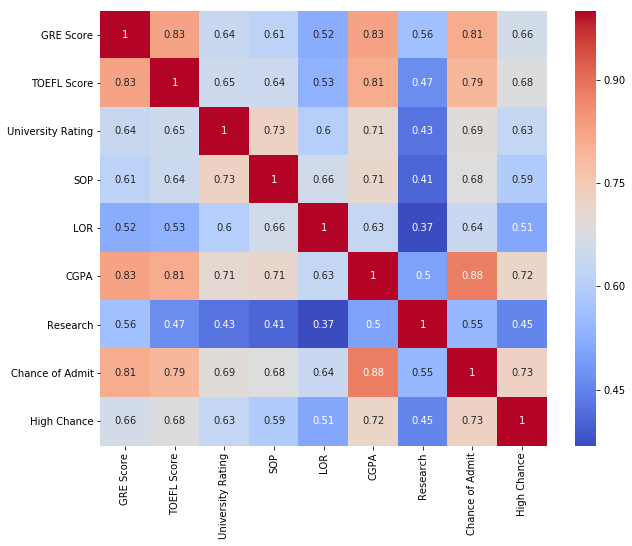

In [37]:
# heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

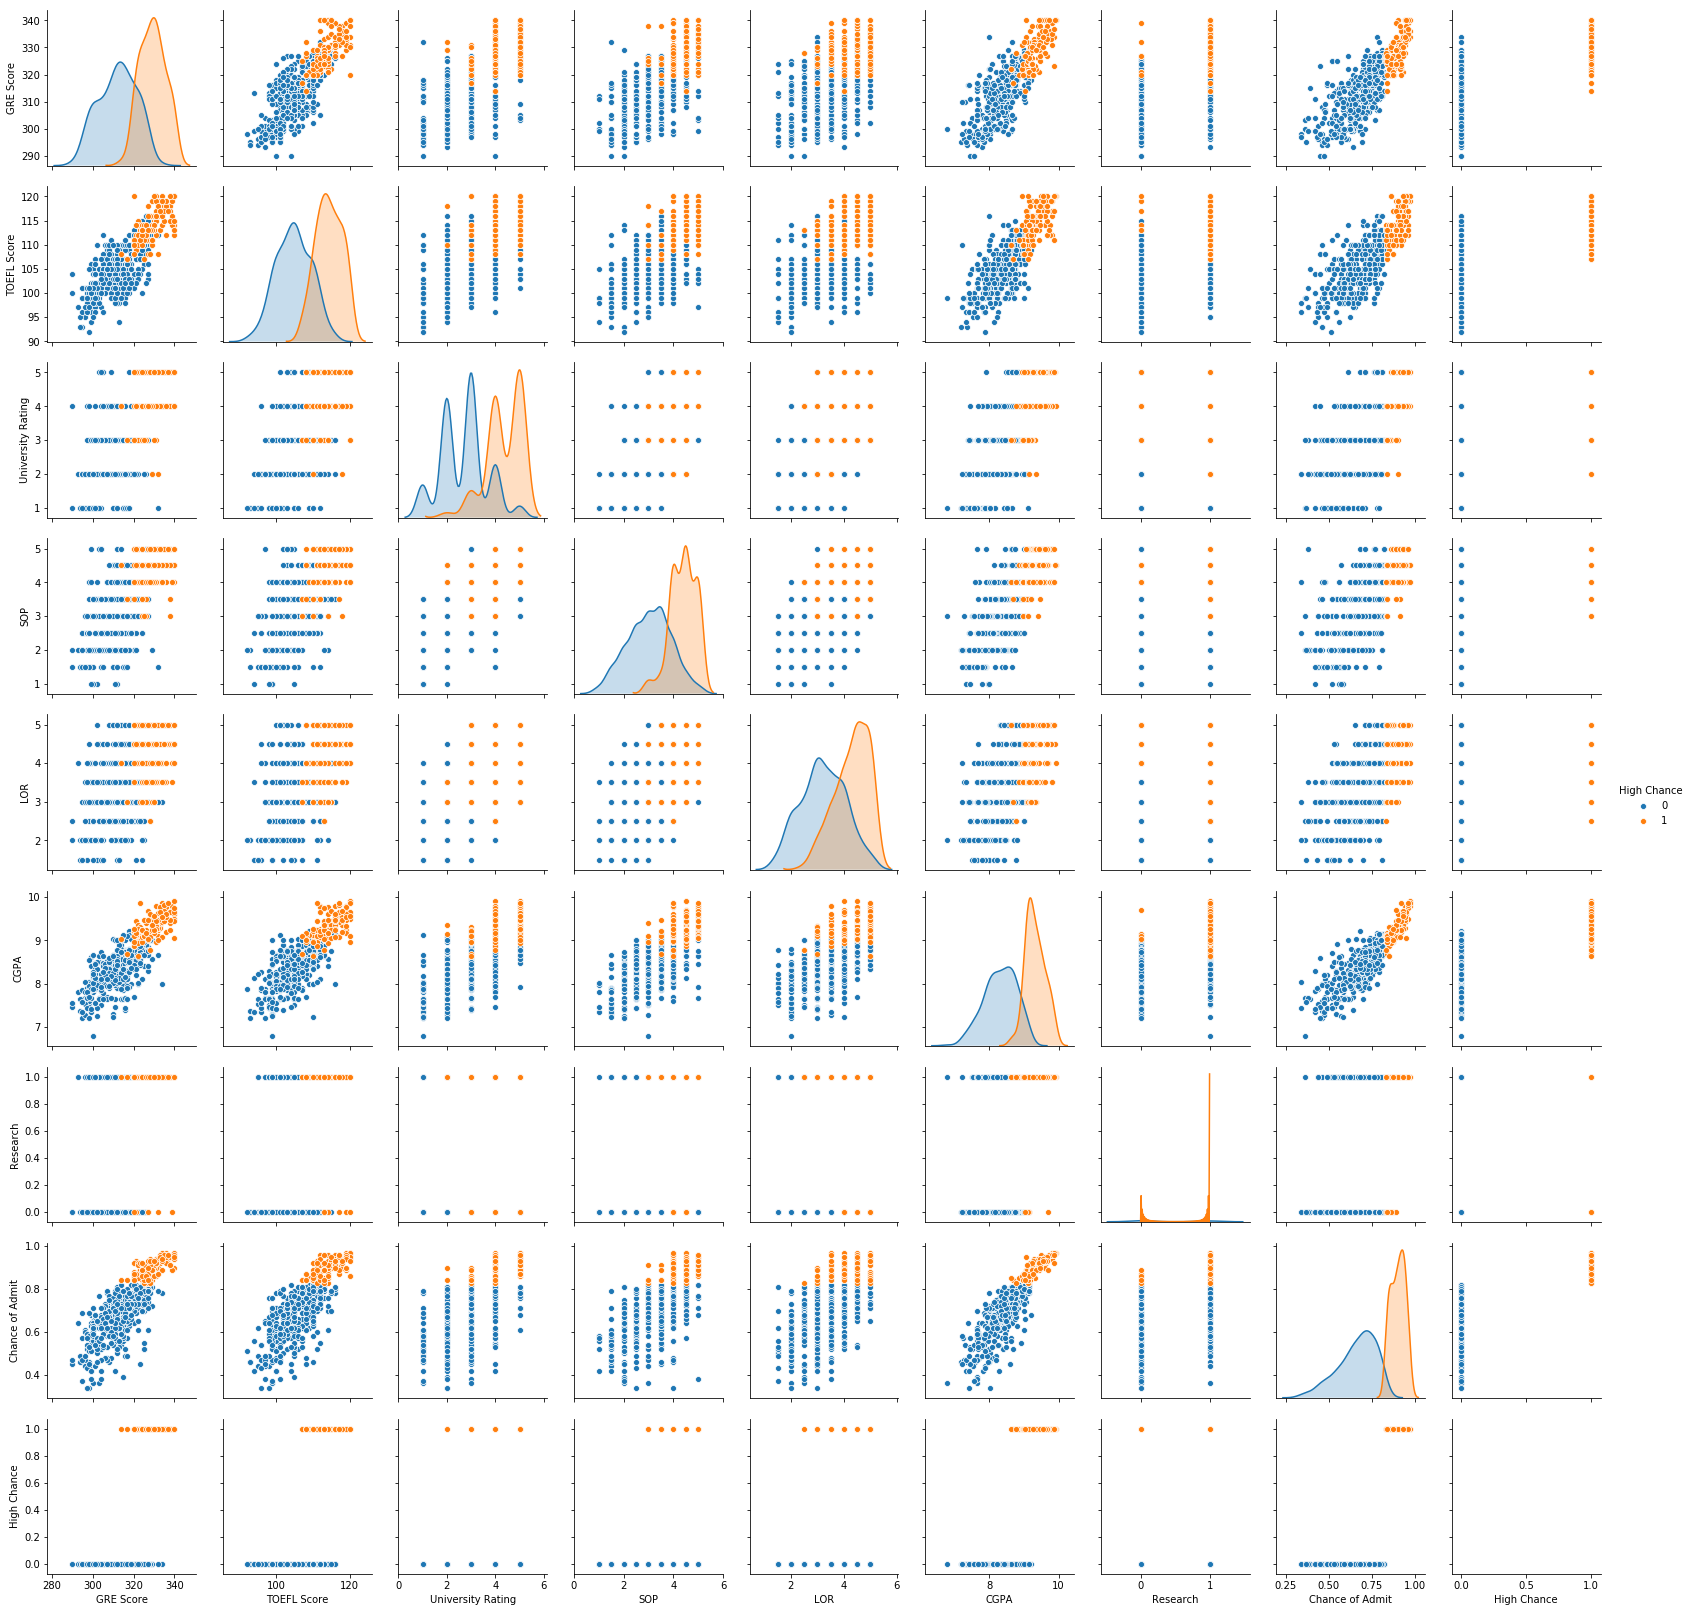

In [38]:
# pair plot
sns.pairplot(df, hue="High Chance")
plt.show()

### Chance of Admit vs (CGPA, GRE Score and TOEFL Score)
* Chance of Admit increases as CGPA, GRE Score and TOEFL Score increase.

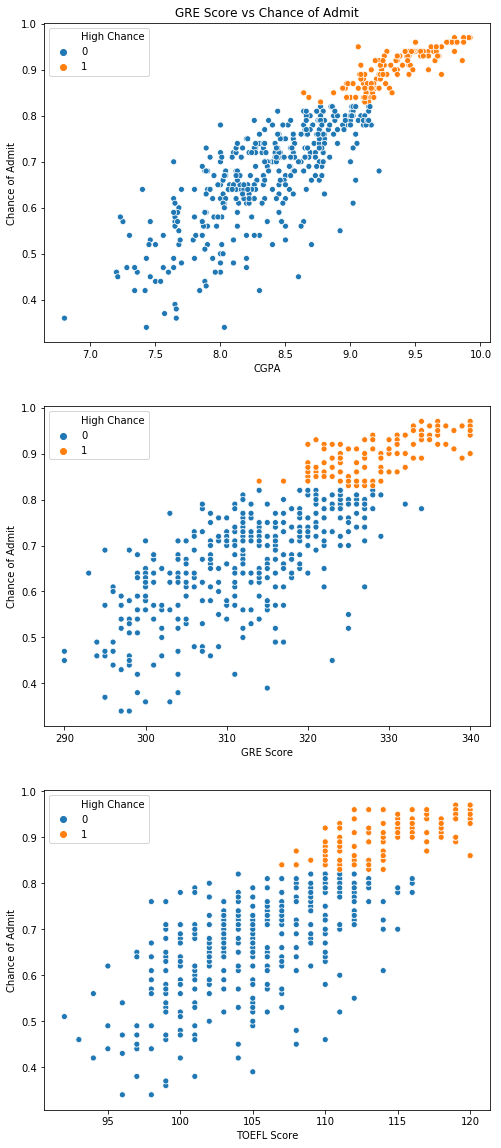

In [39]:
# scatter plots
fig, ax = plt.subplots(3,1, figsize=(8,20))
sns.scatterplot(data=df, x="CGPA", y="Chance of Admit", hue="High Chance", ax=ax[0])
ax[0].set_title("GRE Score vs Chance of Admit")

sns.scatterplot(data=df, x="GRE Score", y="Chance of Admit", hue="High Chance", ax=ax[1])
ax[0].set_title("GRE Score vs Chance of Admit")

sns.scatterplot(data=df, x="TOEFL Score", y="Chance of Admit", hue="High Chance", ax=ax[2])
ax[0].set_title("GRE Score vs Chance of Admit")

plt.show()

### Chance of Admit vs (SOP and LOR)
* Chance of Admit is higher for higher SOP and LOR ratings.

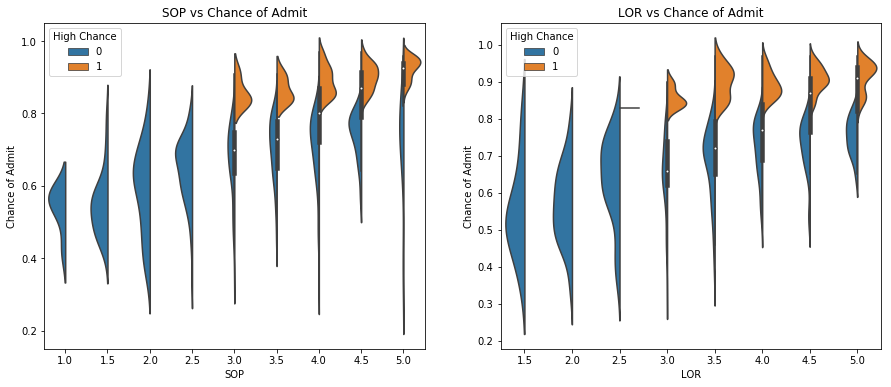

In [40]:
# violin plots
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.violinplot(data=df, x="SOP", y="Chance of Admit", hue="High Chance", split=True, ax=ax[0])
ax[0].set_title("SOP vs Chance of Admit")

sns.violinplot(data=df, x="LOR", y="Chance of Admit", hue="High Chance", split=True, ax=ax[1])
ax[1].set_title("LOR vs Chance of Admit")

plt.show()

### Chance of Admit vs Research
* The mean value of Chance of Admit for students with research experience is greater than the mean value of those without research experience.
* Proportion of students with research experience among top 25% of student w.r.t Chance of Admit is far greater than those without any research experience.

Research            0         1
High Chance                    
0            0.569149  0.430851
1            0.048387  0.951613


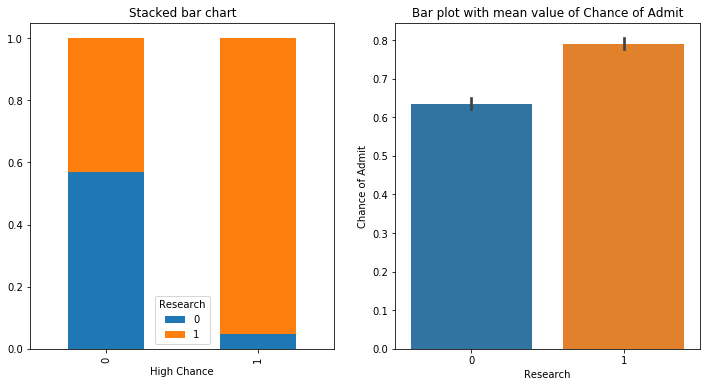

In [41]:
# proportional plot
ct_highchance_research = pd.crosstab(df["High Chance"], df["Research"], normalize=0)
print(ct_highchance_research)

# stacked bar chart to show the proportion of students with and without reasearch experience  
fig, ax = plt.subplots(1,2, figsize=(12,6))
ct_highchance_research.plot.bar(stacked=True, ax=ax[0])
ax[0].set_title("Stacked bar chart")

# bar plot with mean value of Chance of Admit for each research category
sns.barplot(data=df, x="Research", y="Chance of Admit", ax=ax[1])
ax[1].set_title("Bar plot with mean value of Chance of Admit")

plt.show()